In [1]:
from ondepi.applications import price_level as pl
from ondepi.visualisations import sample as plot_sample
from ondepi.resources import utils

In [2]:
symbol = 'INTC'
date = '2019-01-31'
price_level = 466000
direction = 1
std_size = 500
t0 = 1.05e3
t1 = 1.50e3
reset_time_origin = True

In [3]:
queue = pl.init_queue_on_lobster_data(
    symbol=symbol, date=date,
    price_level=price_level, direction=direction, std_size=std_size,
    t0=t0, t1=t1, reset_time_origin=reset_time_origin
)

symbol: INTC
date: 2019-01-31
direction: 1
price_level: 466000
std_size: 500
reset_time_origin: True


In [4]:
queue = pl.set_param(queue)

In [5]:
df_sample = queue.get_df_sample()

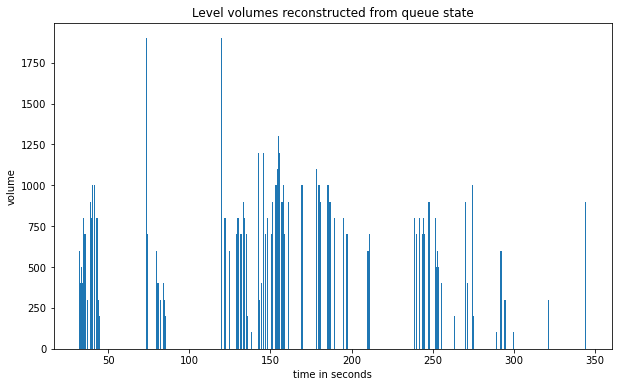

In [6]:
ax = plot_sample.plot_reconstructed_volumes(df_sample, std_size=std_size, time_range=None)

In [8]:
queue.simulate(max_time=10.0e3, max_events=10.0e3, first_event=1, first_state=5)

In [9]:
df = queue.get_df_sample()

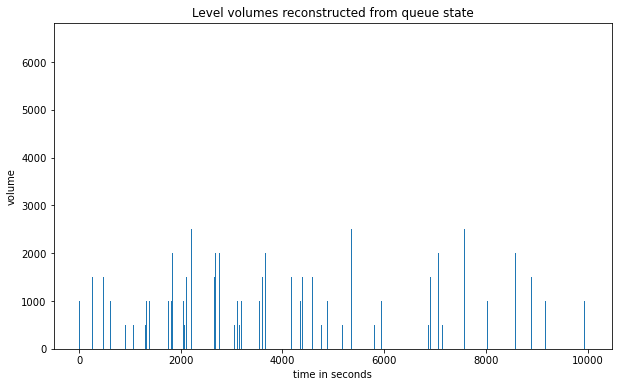

In [18]:
ax = plot_sample.plot_reconstructed_volumes(df, std_size=std_size, time_range=None)

In [11]:
queue.filter(dt=7.5e-3, num_states=30)

In [12]:
df = pl.produce_df_detection(queue, beta=5.5e-3)

In [13]:
df.describe()

,idx,time sample,time filter,state,expected val,predictor,error
count,2.085000e+03,2085.000000,2085.000000,2085.000000,2085.000000,2085.000000,2085.000000
mean,4.904041e+08,4904.040957,4904.040957,2.427338,12.279789,3.890128,-1.462790
std,3.021795e+08,3021.795383,3021.795383,1.960532,5.362557,2.244469,2.775136
min,0.000000e+00,0.000000,0.000000,0.000000,0.264677,1.009077,-11.953427
25%,2.215661e+08,2215.660685,2215.660685,1.000000,8.237479,2.081971,-3.095444
50%,4.640587e+08,4640.586856,4640.586856,2.000000,12.327630,3.537912,-1.213107
75%,7.832469e+08,7832.468924,7832.468924,3.000000,16.470315,4.961738,0.121256
max,9.976393e+08,9976.392781,9976.392781,13.000000,23.781852,12.150962,7.588978


<AxesSubplot:title={'center':'Level volumes reconstructed from queue state and their expected values'}, xlabel='time in seconds', ylabel='volume'>

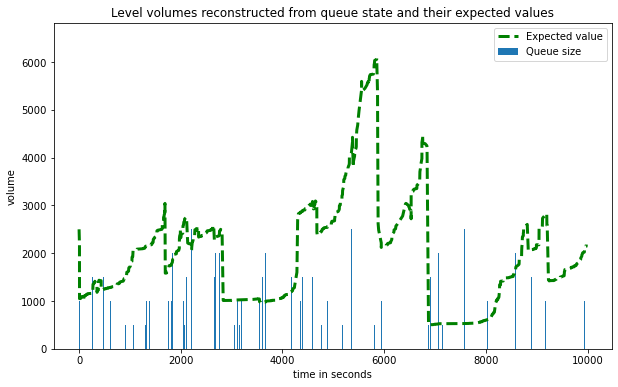

In [17]:
plot_sample.plot_df_detection(df, std_size=std_size)

In [15]:
df_intensity = queue.get_df_intensity_process()

<AxesSubplot:xlabel='time'>

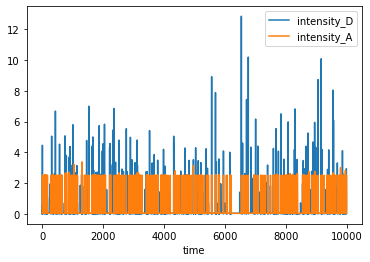

In [16]:
df_intensity.set_index('time')[:].plot()